In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np


from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold
from sklearn import svm

import gc
import myutil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
class svmWrapper():
    def __init__(self):
        return
    
    def __repr__(self):
        return 'svm'
    
    def init_model(self):
        self.clf = svm.LinearSVC(dual=False )   
        return    

    def train(self, trn_x, trn_y):
        self.clf.fit(trn_x, trn_y)

    def predict(self, x):
        result = self.clf.predict(x)
        print(result)
        return result
    
    def get_coef(self):
        return self.clf.coef_.reshape(-1,1)

svm_model = svmWrapper()

In [5]:
data, test, y = myutil.get_train_test_label()

(307511, 826)
(48744, 826)


In [6]:
oof_preds, test_preds, importances, folds = myutil.cross_validation(data, test, y, svm_model)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
Fold  1 AUC : 0.500501
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
Fold  2 AUC : 0.500029
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
Fold  3 AUC : 0.500140
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
Fold  4 AUC : 0.500175


/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
Fold  5 AUC : 0.500094
Full AUC score 0.500189


svm
Index(['prev_app_DAYS_FIRST_DRAWING_mean', 'prev_app_DAYS_FIRST_DRAWING_max',
       'prev_app_DAYS_FIRST_DRAWING_min', 'bureau_DAYS_CREDIT_mean',
       'DAYS_LAST_PHONE_CHANGE', 'install_DAYS_ENTRY_PAYMENT_min',
       'install_DAYS_INSTALMENT_min', 'bureau_DAYS_CREDIT_max',
       'bureau_DAYS_CREDIT_min', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'prev_app_DAYS_LAST_DUE_1ST_VERSION_sum',
       'bureau_DAYS_ENDDATE_FACT_min', 'prev_app_DAYS_DECISION_min',
       'DAYS_EMPLOYED', 'install_DAYS_ENTRY_PAYMENT_sum',
       'prev_app_DAYS_DECISION_mean', 'bureau_DAYS_CREDIT_UPDATE_mean',
       'prev_app_DAYS_FIRST_DUE_sum', 'prev_app_DAYS_FIRST_DUE_min',
       'bureau_DAYS_ENDDATE_FACT_mean', 'prev_app_DAYS_DECISION_max',
       'install_DAYS_LATE_PAYMENT_sum', 'prev_app_DAYS_TERMINATION_min',
       'DAYS_REGISTRATION', 'credit_bal_AMT_DRAWINGS_CURRENT_mean',
       'credit_bal_SK_DPD_DEF_sum', 'pos_cash_DPD_SK_DPD_max',
       'install_DAYS_ENTRY_PAYMENT_mean', 'install_DAYS_LATE_

/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


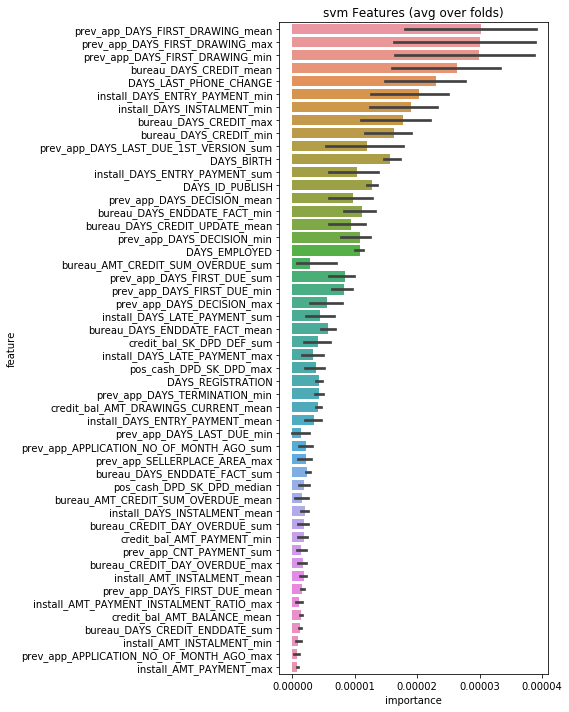

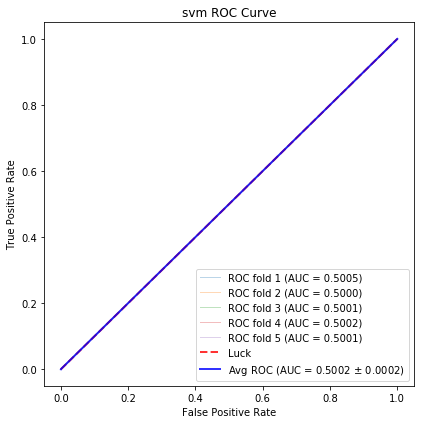

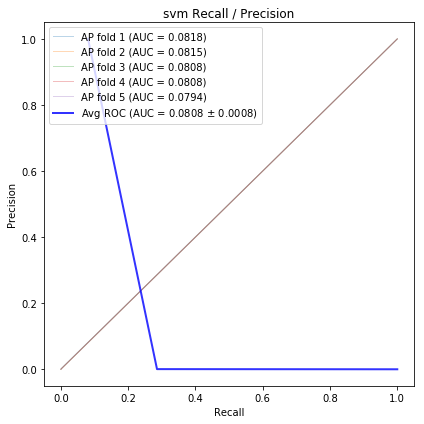

In [7]:
title = 'svm'
myutil.report(test_preds, folds, importances, data, y, oof_preds, title)